In [78]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from mxnet import autograd, nd
import random

生成数据集

In [79]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [80]:
features[0], labels[0]

(
 [-0.56608427 -0.39505458]
 <NDArray 2 @cpu(0)>,
 
 [4.4099846]
 <NDArray 1 @cpu(0)>)

In [81]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

# def set_figsize(figsize=(3.5, 2.5)):
#     """Set the size of matplotlib figures."""
#     use_svg_display()
#     plt.rcParams['figure.figsize'] = figsize

from matplotlib_inline import backend_inline

def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')


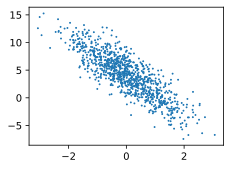

In [82]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

读取数据

In [83]:
# 读取数据
def data_iter(batch_size, features, labels): # batch_size: 小批量样本数量, features: 特征, labels: 标签
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 随机读取样本
    for i in range(0, num_examples, batch_size):
        j=nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j), labels.take(j)

In [84]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.47873506  0.14610374]
 [-0.78480357  0.7669253 ]
 [ 1.5385741   2.5360804 ]
 [ 0.09734414 -1.1646531 ]
 [ 0.40048274 -0.06509788]
 [ 0.636401   -0.13121775]
 [ 1.5267444  -0.06284162]
 [-1.2963026  -0.7522806 ]
 [ 0.5356904   0.04464764]
 [ 2.3648756   2.3073394 ]]
<NDArray 10x2 @cpu(0)> 
[ 2.7513072   0.01310451 -1.3501703   8.35581     5.246535    5.9231935
  7.460212    4.1730804   5.1192646   1.074014  ]
<NDArray 10 @cpu(0)>


初始化模型参数

In [85]:
w=nd.random.normal(scale=0.01, shape=(num_inputs, 1)) # 将权重初始化为均值为0，标准差为0.01的正态随机数
b=nd.zeros(shape=(1,)) # 将偏置初始化为0

In [86]:
w.attach_grad()
b.attach_grad()

定义模型

In [87]:
def linreg(X,w,b):
    return nd.dot(X,w)+b # 线性回归模型

定义损失函数

In [88]:
def square_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2 # 平方损失函数
# 为什么要使用reshape呢？
# 因为y_hat的shape是(10,1)，而y的shape是(10,)，如果不使用reshape，y_hat-y的shape是(10,10)，而y.reshape(y_hat.shape)的shape是(10,1)，这样y_hat-y的shape就与y_hat的shape相同了。

定义优化算法

In [89]:
def sgd(params, lr, batch_size): # params: 参数, lr: 学习率, batch_size: 小批量样本数量
    for param in params:
        param[:] -= lr * param.grad / batch_size # 小批量随机梯度下降

训练模型

In [90]:
lr=0.04
num_epochs=3
net=linreg
loss=square_loss

for epoch in range(num_epochs): # 训练模型
    for X,y in data_iter(batch_size, features, labels):
        with autograd.record():
            l=loss(net(X,w,b),y) # l是小批量样本上的损失
        l.backward() # 反向传播，计算梯度
        sgd([w,b],lr,batch_size) # 更新参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.006058
epoch 2, loss 0.000054
epoch 3, loss 0.000052


* 学习率 0.04

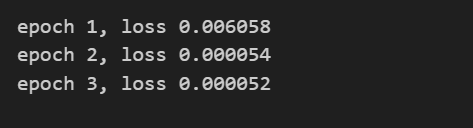

* 学习率 0.03

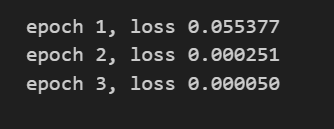

* 学习率 0.02

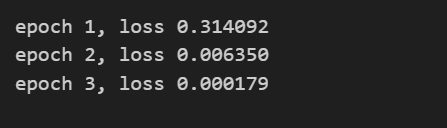

* 学习率 0.01

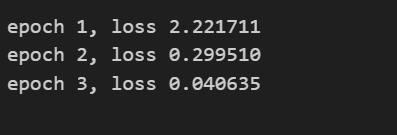

* 学习率（Learning Rate，简称 lr） 是深度学习和机器学习中一个非常重要的超参数，它控制模型参数在每次更新时的步长大小。学习率的选择直接影响模型的训练效果和收敛速度。

* 学习率过小：模型收敛速度慢，训练时间过长。学习率过大：可能导致模型无法收敛，甚至发散。

In [91]:
true_w, w

([2, -3.4],
 
 [[ 1.9998847]
  [-3.4003956]]
 <NDArray 2x1 @cpu(0)>)

In [92]:
true_b, b

(4.2,
 
 [4.200716]
 <NDArray 1 @cpu(0)>)

简洁实现

In [93]:
from mxnet.gluon import data as gdata, loss as gloss, nn
batch_size = 10
dataset=gdata.ArrayDataset(features,labels)
data_iter=gdata.DataLoader(dataset,batch_size,shuffle=True)

In [94]:
for X,y in data_iter:
    print(X,y)
    break


[[-3.0863655   0.97674155]
 [-0.01287131 -1.524019  ]
 [-0.82482535 -1.6863712 ]
 [-1.8746033  -0.5437933 ]
 [-0.6048916   0.8421543 ]
 [-0.24430668  0.78295743]
 [ 2.3777018  -0.30131242]
 [-0.4671355   1.1386713 ]
 [ 1.7192782   0.58820456]
 [ 0.99282074  0.17844912]]
<NDArray 10x2 @cpu(0)> 
[-5.282834    9.331163    8.298629    2.3105302   0.12207533  1.0484277
  9.973675   -0.60252976  5.6413846   5.5782557 ]
<NDArray 10 @cpu(0)>


In [95]:
from mxnet.gluon import nn
net=nn.Sequential()

In [96]:
net.add(nn.Dense(1))

In [98]:
from mxnet import init
net.initialize(init.Normal(sigma=0.01))
# 通过Sequential容器将两个操作连接起来，并使用init.Normal(sigma=0.01)初始化权重参数

c:\Users\SU_hole\anaconda3\envs\mxnet_env\lib\site-packages\mxnet\gluon\parameter.py:893: UserWarning: Parameter 'dense0_bias' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


In [100]:
from mxnet.gluon import loss as gloss
loss=gloss.L2Loss()

In [101]:
from mxnet import gluon
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.03}) 
# 使用Trainer类来定义优化器，这里使用的是小批量随机梯度下降（SGD）优化器，学习率为0.03

In [102]:
num_epochs=3
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        with autograd.record():
            l=loss(net(X),y)
        l.backward()
        trainer.step(batch_size)
    l=loss(net(features),labels)
    # 如果变成l=loss(net(X),y).mean()，修改trainer.step(batch_size)为trainer.step(1)，为什么？，
    # 因为l=loss(net(X),y)的shape是(10,)，而l=loss(net(X),y).mean()的shape是(1,)，所以需要修改trainer.step(batch_size)为trainer.step(1)。
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.044580
epoch 2, loss: 0.000177
epoch 3, loss: 0.000053


In [103]:
dense=net[0]
true_w, dense.weight.data() # 真实权重和模型权重

([2, -3.4],
 
 [[ 1.9993988 -3.3998537]]
 <NDArray 1x2 @cpu(0)>)

In [104]:
true_b, dense.bias.data() # 真实偏置和模型偏置

(4.2,
 
 [4.200041]
 <NDArray 1 @cpu(0)>)